In [37]:
import pandas as pd
import numpy as np
import json


## Exercise 1

First we load and take a look at the dataset

In [38]:
dessert_data = pd.read_json("data/dessert.json")
dessert_data.drop(["portions", "nutrients"],axis=1,inplace=True)
dessert_data.sample(10)



,id,description,tags,manufacturer,type
65,18105,"Coffeecake, creme-filled with chocolate frosting",[],,Cake
61,18101,"Cake, chocolate, prepared from recipe without ...",[],None,Cake
273,18433,"Danish pastry, lemon, unenriched",[],,Puff Pastry
168,18261,"English muffins, mixed-grain, toasted (include...",[],None,Savory Bread
19,18036,Multi-grain bread with nutella (toasted),[],None,Sweet Bread
153,18233,"Crackers, wheat, sandwich, with cheese filling",[],,Savory Bread
89,18144,"Cake, yellow, dry mix, regular, enriched",[],,Cake
175,18268,"French toast, frozen, ready-to-heat",[],,Sweet Bread
93,18152,"Cookies, brownies, dry mix, regular",[],,Cookies
186,18282,"Muffins, corn, prepared from recipe, made with...",[],None,Muffins


### Exercise 1a)

We decided to replace empty Strings and `None` values with the string "No manufacturer" for the **Manufacturer** column:

In [39]:
dessert_data.replace("", None, inplace=True)
dessert_data.fillna(value="no Manufacturer",inplace=True)
dessert_data["manufacturer"].sample(40) 

60     no Manufacturer
321    Archway Cookies
69     no Manufacturer
115    no Manufacturer
226    no Manufacturer
371    no Manufacturer
82     no Manufacturer
159    no Manufacturer
340    Archway Cookies
223    no Manufacturer
242    no Manufacturer
171    no Manufacturer
317       Kellogg, Co.
225    no Manufacturer
190    no Manufacturer
299       Kellogg, Co.
30     no Manufacturer
148    no Manufacturer
19     no Manufacturer
80     no Manufacturer
320    Archway Cookies
18     no Manufacturer
319    Archway Cookies
286    no Manufacturer
133    no Manufacturer
347    Archway Cookies
206    no Manufacturer
275    no Manufacturer
259    no Manufacturer
305       Kellogg, Co.
312       Kellogg, Co.
186    no Manufacturer
172    no Manufacturer
204    no Manufacturer
216    no Manufacturer
331    Archway Cookies
219    no Manufacturer
266    no Manufacturer
177    no Manufacturer
35     no Manufacturer
Name: manufacturer, dtype: object

Next, we need to extract the contents of the lists in the **tags** column. We define a function to print the content of the list and return it:

In [40]:
def print_list(my_list):
    if len(my_list) > 0:
        count = 0
        for x in my_list:
            print(f"list value of element {count}: {x}")
            count += 1
    return my_list
dessert_data["tags"].map(print_list)

list value of element 0: Include commodity code B367
list value of element 0: Include commodity code B368
list value of element 0: Latino food
list value of element 0: Latino food


0                 []
1                 []
2                 []
3                 []
4                 []
           ...      
387               []
388               []
389               []
390    [Latino food]
391    [Latino food]
Name: tags, Length: 392, dtype: object

As you can see, we have only 4 list entries actually containing any tags in the entire column. And for those entries, the list has a length of 1, which means we can use a similiar function to extract the values from the list and return them as a string to the dataframe:

In [41]:
def extract_list_ele(my_list): #returns first content of list if non empty and "no Tags" otherwise
    if type(my_list) == list: # check if we are working on lists
        if len(my_list) == 0:
            return "no Tags"
        else:
            return my_list[0]
    else: #if not list, do nothing
        return my_list

dessert_data["tags"]=dessert_data["tags"].map(extract_list_ele)

dessert_data.sample(10)

,id,description,tags,manufacturer,type
133,18204,"Cookies, sugar, commercially prepared, regular...",no Tags,no Manufacturer,Cookies
139,18213,"Cookies, vanilla wafers, higher fat",no Tags,no Manufacturer,Cookies
214,18334,"Pie crust, standard-type, frozen, ready-to-bak...",no Tags,no Manufacturer,Cake
215,18335,"Pie crust, standard-type, frozen, ready-to-bak...",no Tags,no Manufacturer,Cake
20,18037,Healthy Bread with oat bran and cream,no Tags,no Manufacturer,Sweet Bread
293,18479,"Toaster Pastries, KELLOGG, KELLOGG'S POP TARTS...",no Tags,"Kellogg, Co.",Toaster Pastries
292,18478,"Toaster Pastries, KELLOGG, KELLOGG'S POP TARTS...",no Tags,"Kellogg, Co.",Toaster Pastries
24,18041,White Pita Doughnut,no Tags,no Manufacturer,Sweet Breads
369,18640,"HEINZ, WEIGHT WATCHER, Chocolate Eclair, frozen",no Tags,"H.J. Heinz, Co.",Cream Puff
202,18309,"Pie, cherry, prepared from recipe",no Tags,no Manufacturer,Cake


We need to consolidate different types of spellings in the `type` column:

In [42]:
dessert_data["type"].unique()

array(['Biscuits', 'Sweet Bread', 'Savory Bread', 'Sweet bread',
       'Sweet Breads', 'no Manufacturer', 'Cake', 'Cookies', 'Coookies',
       'Puff Pastry', 'Savory bread', 'Cream Puff', 'Muffins',
       'sweet bread', 'Muffin', 'Toaster Pastries', 'Muesli', 'Biscuit',
       'Cookie'], dtype=object)

In [43]:
dessert_data.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data.replace("Cookies", "Cookie", inplace=True)
dessert_data.replace("Coookies", "Cookie", inplace=True)

dessert_data.replace("Biscuits", "Biscuit", inplace=True)

dessert_data.replace("Muffins", "Muffin", inplace=True)

dessert_data.replace("Savory bread", "Savory Bread", inplace=True)

Furthermore, we are going to flatten the `nutrients` and `portions` columns with `json_normalize()`:

In [44]:
with open("data/dessert.json") as json_file: 
    dessert_json = json.load(json_file)
    
dessert_data_port = pd.json_normalize(dessert_json, record_path=["portions"],meta=["id","type"],meta_prefix="origin-") # flatten json object into separate df
dessert_data_nutr = pd.json_normalize(dessert_json, record_path=["nutrients"],meta=["id","type"], meta_prefix="origin-") # flatten json object into separate df

since we are loading from the json, we need to consolidate `type` again:

In [45]:
dessert_data_nutr.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_nutr.replace("Cookies", "Cookie", inplace=True)
dessert_data_nutr.replace("Coookies", "Cookie", inplace=True)

dessert_data_nutr.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_nutr.replace("Muffins", "Muffin", inplace=True)

dessert_data_nutr.replace("Savory bread", "Savory Bread", inplace=True)



dessert_data_port.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_port.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_port.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_port.replace("Cookies", "Cookie", inplace=True)
dessert_data_port.replace("Coookies", "Cookie", inplace=True)

dessert_data_port.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_port.replace("Muffins", "Muffin", inplace=True)

dessert_data_port.replace("Savory bread", "Savory Bread", inplace=True)

lets look at the nutr table and check it for none types:

In [46]:
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()] #filter out all rows containing a None type val
nutr_none

,value,units,description,type,origin-id,origin-type
8443,0.078,mg,Vitamin B-6,None,18201,Cookie


We only have one single entry which is None, so we can overwrite it manually with the "Vitamin" type:

In [47]:
dessert_data_nutr.at[8443,"type"] = "Vitamins"
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()]
nutr_none #should be empty now

,value,units,description,type,origin-id,origin-type


Next, there is one negative value which we need to set to zero: 

In [48]:
dessert_data_nutr[dessert_data_nutr["value"]< 0]

,value,units,description,type,origin-id,origin-type
416,-88.0,mcg,"Folate, total",Vitamins,18017,Biscuit


In [49]:
dessert_data_nutr.at[416, "value"] = 0
dessert_data_nutr[dessert_data_nutr["value"]<0]

,value,units,description,type,origin-id,origin-type


### Exercise 1b)



In [50]:
#get unique dessert types
dessert_data["type"].unique()


array(['Biscuit', 'Sweet Bread', 'Savory Bread', 'no Manufacturer',
       'Cake', 'Cookie', 'Puff Pastry', 'Cream Puff', 'Muffin',
       'Toaster Pastries', 'Muesli'], dtype=object)

<AxesSubplot:>

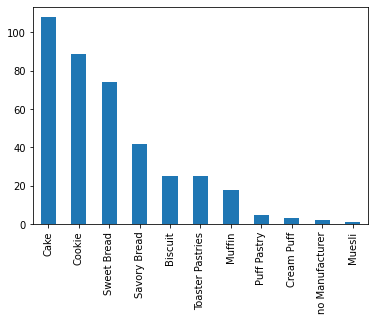

In [51]:
#get dessert type distribution
dessert_data["type"].value_counts().plot.bar()

### Exercise 1 c)

We need to display the median of vitamins by food type. In order to achieve this, we use the `groupby()` method:

In [59]:
dessert_data_nutr.drop("origin-id",axis=1).groupby(["origin-type"]).median(True)

,value
origin-type,
Biscuit,2.0000
Cake,0.5000
Cookie,1.7000
Cream Puff,1.4000
Muesli,4.9500
Muffin,0.7500
Puff Pastry,0.5415
Savory Bread,0.6040
Sweet Bread,0.5340
